In [1]:
from sklearn.preprocessing import RobustScaler
from datetime import datetime
import pandas as pd
import pandas as pd
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Set up logging
logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [2]:
filepath = "data/msd_full_data.csv"
data = pd.read_csv(filepath)
df = data.copy()
df.head()

,track_id,user_id,playcount,age,gender,name,artist,spotify_preview_url,spotify_id,tags,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Nothing From Nothing,Billy Preston,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,0d42LKqrWFVu05jAv9mwwE,"soul, funk, piano, 70s, oldies",...,9,-5.206,0,0.0276,0.58500,0.05500,0.3310,0.939,102.792,4
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Paper Gangsta,Lady Gaga,https://p.scdn.co/mp3-preview/5d27f0eb10363c13...,079ZOccLpNsrEiKBaiTrqI,"electronic, pop, female_vocalists, dance, pian...",...,10,-9.344,0,0.0579,0.80400,0.78200,0.1050,0.800,100.002,4
2,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Stacked Actors,Foo Fighters,https://p.scdn.co/mp3-preview/d7350c743c3d917f...,1vziI0NCJKrqKiG94COHBa,"rock, alternative, alternative_rock, hard_rock...",...,7,-5.145,1,0.0500,0.00203,0.00102,0.2340,0.670,134.898,4
3,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Heaven's Gonna Burn Your Eyes,Thievery Corporation,https://p.scdn.co/mp3-preview/c7f3b22fb4a680f0...,4SnH0V1cnEPUqMSzgDlxKb,"electronic, female_vocalists, ambient, chillou...",...,9,-9.812,1,0.0286,0.63500,0.52100,0.0637,0.323,152.411,4
4,TRUTULC128F4293712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,57,0,Gimme Stitches,Foo Fighters,https://p.scdn.co/mp3-preview/3652c6d3c9317729...,1MEbfjEGUiOtdOUjNpnbdm,"rock, alternative_rock, hard_rock, grunge",...,2,-4.423,1,0.0680,0.00212,0.00215,0.2410,0.541,111.842,4


In [3]:
# 1. correct encoding of user ids with hashing
# 2. correct encoding of music ids with hashing
# 3. verify number of unique users and songs match by shape

In [4]:
# # Step 1: Check for unique music_ids
# unique_music_ids = df["track_id"].nunique()
# total_rows = len(df)
# if unique_music_ids != total_rows:
#     logging.warning(
#         f"Mismatch in music_ids: Expected {total_rows} unique IDs but found {unique_music_ids}"
#     )
#     # Assuming we need to rehash music_ids
#     df["music_id"] = df["name"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
#     logging.info("Rehashed music_ids to ensure uniqueness.")
# else:
#     logging.info("All music_ids are unique.")

# # Debug: Show the updated data after rehashing music_ids (if needed)
# print("\nData after music_id rehashing:")
# df.head()

# # Step 2: Restructure user_ids
# unique_users = df["user_id"].unique()
# user_id_mapping = {
#     old_id: new_id for new_id, old_id in enumerate(unique_users, start=1)
# }

# # Apply the mapping to create new user_ids
# df["new_user_id"] = df["user_id"].map(user_id_mapping)

# # Debug: Show the updated data after restructuring user_ids
# print("\nData after user_id restructuration:")
# df.head()


# # Optional Step 3: Hash new_user_ids for robustness
# def hash_user_id(user_id):
#     return hashlib.sha256(str(user_id).encode()).hexdigest()


# df["hashed_user_id"] = df["new_user_id"].apply(hash_user_id)

# # Debug: Show the final data after hashing user_ids (if needed)
# print("\nFinal data after hashing user_ids:")
# df.head()

In [5]:
df["track_id"].nunique(), df["name"].nunique()
print(
    f'Number of unique users: {df["track_id"].nunique()}\nNumber of unique songs: {df["track_id"].nunique()}'
)

Number of unique users: 16119
Number of unique songs: 16119


In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import hashlib
# import logging
# from datetime import datetime

# # Set up logging
# logging.basicConfig(
#     level=logging.DEBUG, format="%(asctime)s - %(levelname)s - %(message)s"
# )


# # Step 1: Check for unique track_ids
# unique_track_ids = df["track_id"].nunique()
# total_rows = len(df)
# if unique_track_ids != total_rows:
#     logging.warning(
#         f"Mismatch in track_ids: Expected {total_rows} unique IDs but found {unique_track_ids}"
#     )
#     # Assuming we need to rehash track_ids
#     df["track_id"] = df["music"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
#     logging.info("Rehashed track_ids to ensure uniqueness.")
# else:
#     logging.info("All track_ids are unique.")

# # Debug: Show the updated data after rehashing track_ids (if needed)
# print("\nData after track_id rehashing:")
# print(df.head())

# # Step 2: Restructure user_ids
# unique_users = df["user_id"].unique()
# user_id_mapping = {
#     old_id: new_id for new_id, old_id in enumerate(unique_users, start=1)
# }

# # Apply the mapping to create new user_ids
# df["new_user_id"] = df["user_id"].map(user_id_mapping)

# # Debug: Show the updated data after restructuring user_ids
# print("\nData after user_id restructuration:")
# print(df.head())


# # Optional Step 3: Hash new_user_ids for robustness
# def hash_user_id(user_id):
#     return hashlib.sha256(str(user_id).encode()).hexdigest()


# df["hashed_user_id"] = df["new_user_id"].apply(hash_user_id)

# # Debug: Show the final data after hashing user_ids (if needed)
# print("\nFinal data after hashing user_ids:")
# print(df.head())

# # Step 4: Check for class imbalances
# categorical_columns = ["gender", "genre", "explicit", "age_group"]

# for column in categorical_columns:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=column, data=df)
#     plt.title(f"Distribution of {column}")
#     plt.show()

# # Step 5: Handle missing values
# # Check for missing values in each column
# missing_values = df.isnull().sum()
# print("\nMissing Values in Each Column:")
# print(missing_values)

# # Handle missing values in 'genre' and 'featured_artists'
# # Example: Fill 'Unknown' with 'Other'
# df["genre"].replace("Unknown", "Other", inplace=True)
# df["featured_artists"].fillna("None", inplace=True)

# # Debug: Show the updated data after handling missing values
# print("\nData after handling missing values:")
# print(df.head())

# # Step 6: Data Type Conversion
# # Convert 'release_date' to datetime
# df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# # Debug: Show the updated data types
# print("\nData Types after conversion:")
# print(df.dtypes)

# # Step 7: Data Consistency
# # Check for duplicate entries
# duplicates = df.duplicated().sum()
# print(f"\nNumber of duplicate entries: {duplicates}")

# # Check for unexpected values in 'release_year'
# if (df["release_year"] < 1900).any() or (
#     df["release_year"] > datetime.now().year
# ).any():
#     logging.warning("Unexpected values found in 'release_year'.")

# # Additional feature engineering can be done here if necessary

2024-11-23 19:00:37,248 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-23 19:00:37,251 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-23 19:00:37,258 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-11-23 19:00:37,260 - DEBUG - findfont: score(FontEntry(fname='/home/josh/Lhydra_rs/tfrs/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-23 19:00:37,261 - DEBUG - findfont: score(FontEntry(fname='/home/josh/Lhydra_rs/tfrs/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-23 19:00:37,261 - DEBUG - findfont: score(FontEntry(fname='/home


Descriptive Statistics for Numeric Columns:
          playcount           age        gender          year   duration_ms  \
count  6.280058e+06  6.280058e+06  6.280058e+06  6.280058e+06  6.280058e+06   
mean   2.584272e+00  3.853449e+01  4.993526e-01  2.004605e+03  2.454175e+05   
std    5.572295e+00  1.500274e+01  4.999996e-01  7.145529e+00  8.801515e+04   
min    1.000000e+00  1.300000e+01  0.000000e+00  1.900000e+03  3.121300e+04   
25%    1.000000e+00  2.600000e+01  0.000000e+00  2.002000e+03  1.988000e+05   
50%    1.000000e+00  3.900000e+01  0.000000e+00  2.006000e+03  2.331060e+05   
75%    2.000000e+00  5.200000e+01  1.000000e+00  2.009000e+03  2.748000e+05   
max    1.862000e+03  6.400000e+01  1.000000e+00  2.020000e+03  1.772986e+06   

       danceability        energy           key      loudness          mode  \
count  6.280058e+06  6.280058e+06  6.280058e+06  6.280058e+06  6.280058e+06   
mean   5.250396e-01  6.876475e-01  5.320260e+00 -7.720014e+00  6.521333e-01   
std   

2024-11-23 19:01:51,531 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-11-23 19:01:51,531 - DEBUG - findfont: score(FontEntry(fname='/home/josh/Lhydra_rs/tfrs/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-23 19:01:51,532 - DEBUG - findfont: score(FontEntry(fname='/home/josh/Lhydra_rs/tfrs/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-23 19:01:51,532 - DEBUG - findfont: score(FontEntry(fname='/home/josh/Lhydra_rs/tfrs/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2

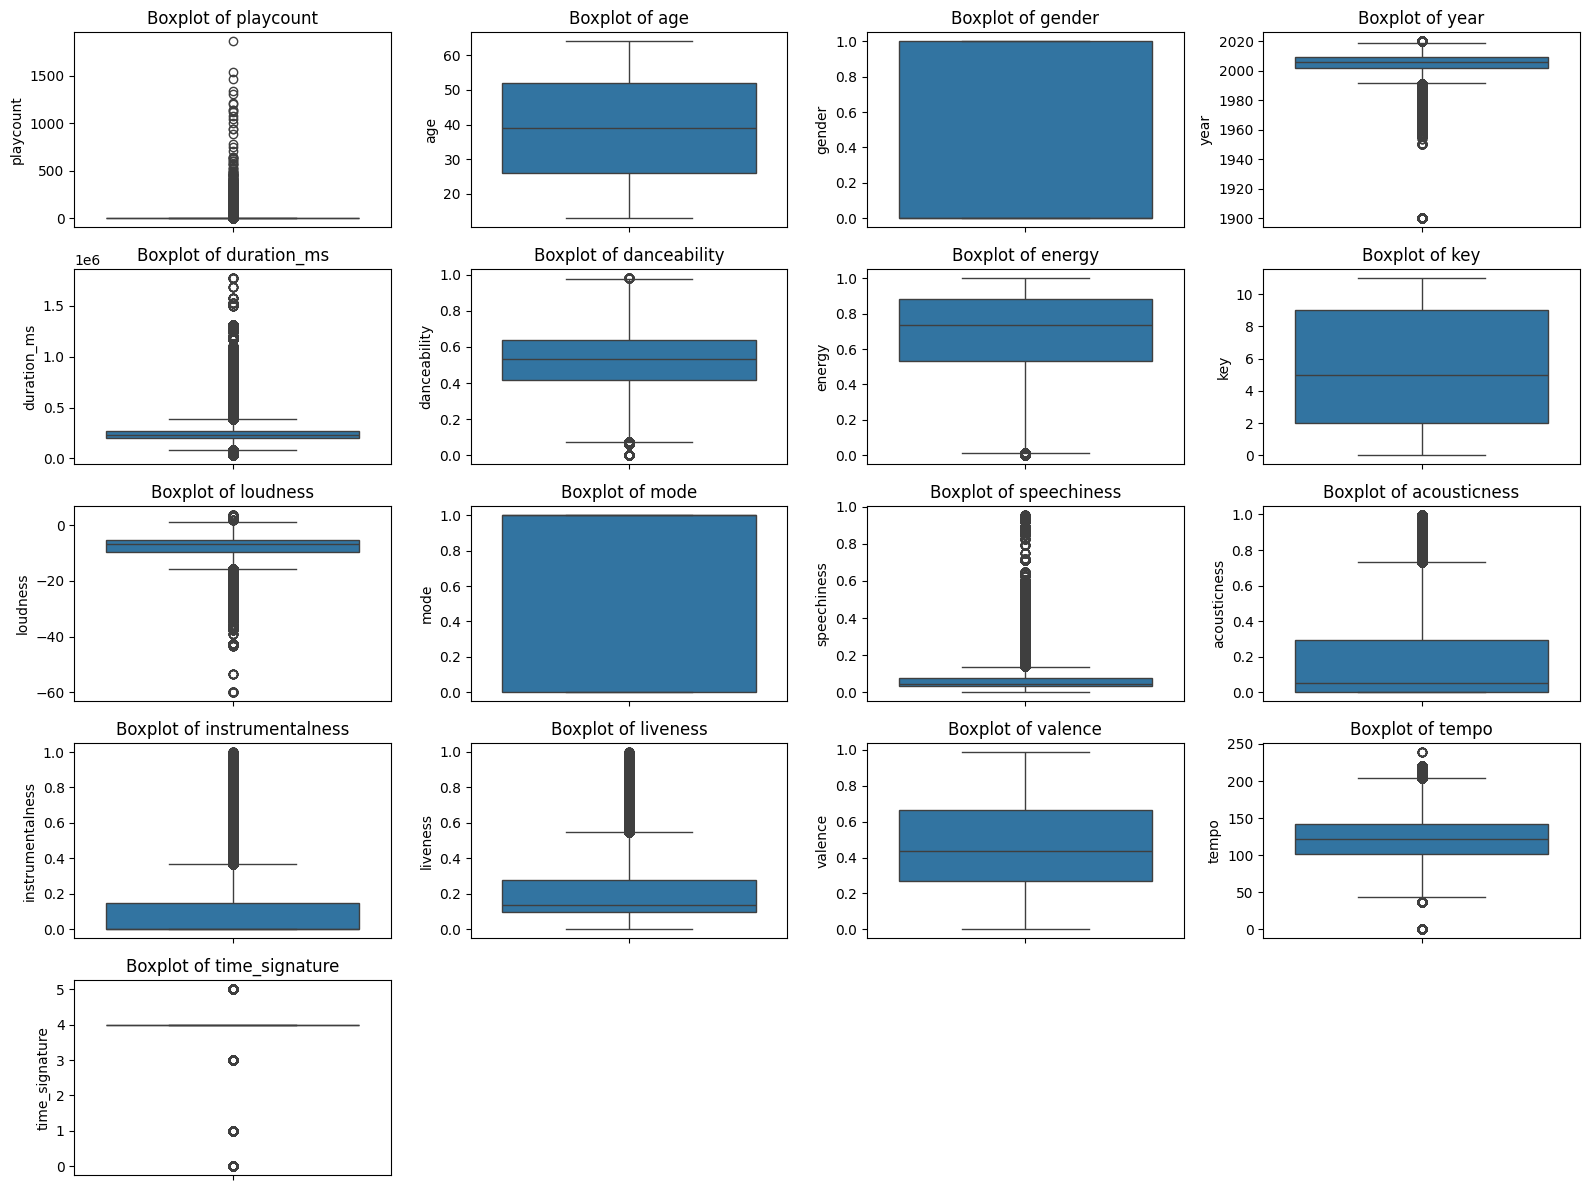

2024-11-23 19:02:00,377 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7f731c353cd0>



Correlation Matrix:
                  playcount       age    gender      year  duration_ms  \
playcount          1.000000  0.000257  0.000452  0.023110    -0.006939   
age                0.000257  1.000000  0.002579  0.000201    -0.000709   
gender             0.000452  0.002579  1.000000  0.000184     0.000514   
year               0.023110  0.000201  0.000184  1.000000    -0.017203   
duration_ms       -0.006939 -0.000709  0.000514 -0.017203     1.000000   
danceability       0.003856  0.001466 -0.001154  0.055582    -0.099521   
energy             0.005746 -0.000380  0.000039  0.046202    -0.014415   
key               -0.002537 -0.000379  0.000278  0.003708     0.019337   
loudness           0.013844  0.000081 -0.000038  0.260434    -0.050549   
mode               0.006479  0.000367 -0.000231 -0.058579    -0.089140   
speechiness       -0.005217 -0.001013 -0.000800  0.027605    -0.054730   
acousticness      -0.000923  0.000123  0.000108  0.042610    -0.105013   
instrumentalness 

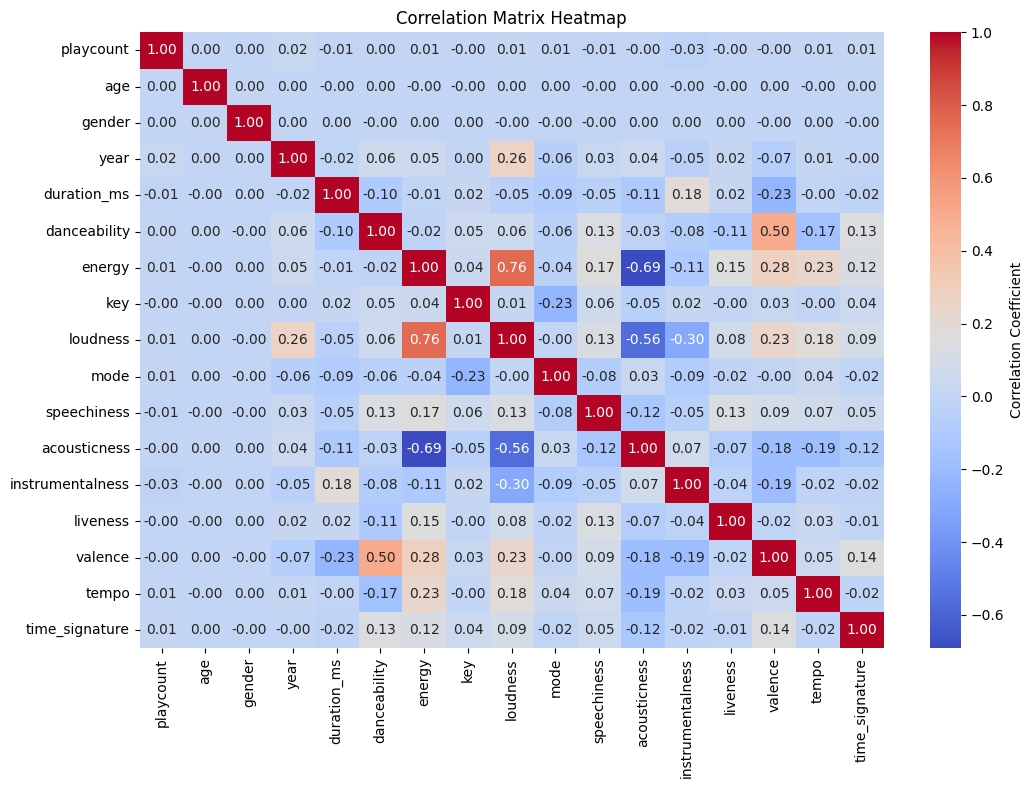

2024-11-23 19:02:01,441 - WARNING - Outliers detected in playcount:


                   track_id                                   user_id  \
21       TRDSFKT12903CB510F  4bd88bfb25263a75bbdd467e74018f4ae570e5df   
24       TRJZLOA128F930369C  e006b1a48f466bf59feefed32bec6494495a4436   
43       TRAQVTO128F14696A6  b64cdd1a0bd907e5e00b39e345194768e330d652   
68       TREWJOK128F92E16C0  17aa9f6dbdf753831da8f38c71b66b64373de613   
71       TRBMCGS128F92D2C27  17aa9f6dbdf753831da8f38c71b66b64373de613   
...                     ...                                       ...   
6280046  TRMIAQM128F4277AC3  cf8289419383259189afe6bb50c5115fd84f1064   
6280048  TRCWBAL128F934B434  cf8289419383259189afe6bb50c5115fd84f1064   
6280049  TRIROYA12903CE1794  cf8289419383259189afe6bb50c5115fd84f1064   
6280051  TREXRBN128F42676B8  cf8289419383259189afe6bb50c5115fd84f1064   
6280052  TRPSAGZ128F425A0AD  cf8289419383259189afe6bb50c5115fd84f1064   

         playcount  age  gender                          name  \
21               4   16       0                     Bree B

2024-11-23 19:02:02,056 - WARNING - Outliers detected in year:


                   track_id                                   user_id  \
20       TRDOYFZ128F426E715  969cc6fb74e076a68e36a04409cb9d3765757508   
31       TRHNJTW128E0784786  b64cdd1a0bd907e5e00b39e345194768e330d652   
48       TRYQHBW128E0784785  b64cdd1a0bd907e5e00b39e345194768e330d652   
71       TRBMCGS128F92D2C27  17aa9f6dbdf753831da8f38c71b66b64373de613   
206      TRWBYQT128E0781140  baf47ed8da24d607e50d8684cde78b923538640f   
...                     ...                                       ...   
6279929  TRITVFR128E078EE0B  3b91968ca65411893d356bb96e7cce1e3fe8f764   
6279932  TRVJGDX128F42645CA  3b91968ca65411893d356bb96e7cce1e3fe8f764   
6279933  TRMATIZ12903CA7203  3b91968ca65411893d356bb96e7cce1e3fe8f764   
6279947  TRAFUBQ128F92EB825  3b91968ca65411893d356bb96e7cce1e3fe8f764   
6279958  TRCPLHF128F14595AE  53a34493ebee96502ddf7886c40f5a1455932bd4   

         playcount  age  gender                            name  \
20               1   16       1                   Saturd

2024-11-23 19:02:02,366 - WARNING - Outliers detected in duration_ms:
2024-11-23 19:02:02,654 - WARNING - Outliers detected in danceability:


                   track_id                                   user_id  \
16       TRADEOV128F9330E3B  bd4c6e843f00bd476847fb75c47b4fb430a06856   
35       TRJXVFS128F14696B2  b64cdd1a0bd907e5e00b39e345194768e330d652   
36       TRXVLLH128F9314656  b64cdd1a0bd907e5e00b39e345194768e330d652   
38       TRFLOVK128F14696AD  b64cdd1a0bd907e5e00b39e345194768e330d652   
49       TRPHPKY128F428D304  b64cdd1a0bd907e5e00b39e345194768e330d652   
...                     ...                                       ...   
6279925  TRUYTGI128F92F61A7  3b91968ca65411893d356bb96e7cce1e3fe8f764   
6279935  TRZFXSA128F93073BE  3b91968ca65411893d356bb96e7cce1e3fe8f764   
6279960  TRIIALE128F92CD1BE  67b00a32e0d314eb059016a24864d5e7ee8219b8   
6279961  TREBYWK128F9330E2A  67b00a32e0d314eb059016a24864d5e7ee8219b8   
6280035  TRGCHLH12903CB7352  8305c896f42308824da7d4386f4b9ee584281412   

         playcount  age  gender                                 name  \
16               1   13       0  Happiness: We're A

2024-11-23 19:02:02,817 - WARNING - Outliers detected in energy:


                   track_id                                   user_id  \
325      TRQBZSQ128F42782DC  a58de017cbeda1763ea002fe027ed41b4ed53109   
730      TRJWZII128F92CA924  3ff7a31452eeabd7a4e07f0d243c674e3d0adf46   
1412     TRPOMAV128F92CA91A  2418d6837aada8911991cc748bc70a9a479f0cb4   
1896     TRPOMAV128F92CA91A  9d332c1944d50d7e4653722db5ba5e55daea2bfd   
2090     TRJQTJT128F148F423  645a5b400d31ce69611137da3ebd35d11d4dda4a   
...                     ...                                       ...   
6276936  TRJWZII128F92CA924  62262cd3a85e805dffe7232ddba185b084e43693   
6278158  TRCICQY128F92E4EE1  21ad304a9b4d99040f1aca221b2bddd744c36e37   
6278585  TRPOMAV128F92CA91A  8cb3e31c3f3e38dfacc9bdb1f6e77a4e67b65acd   
6278967  TRGPZOH128F14649C6  111a999d0d29a8ee548a7ddb6ab48942a1e05c52   
6279154  TRPOMAV128F92CA91A  546676ff62f3a746f1c1b8cf4a19dd1ab5846912   

         playcount  age  gender                           name  \
325              1   22       1              Highway Patr

2024-11-23 19:02:03,201 - WARNING - Outliers detected in loudness:


                   track_id                                   user_id  \
39       TROSBSJ128F427CE2C  b64cdd1a0bd907e5e00b39e345194768e330d652   
71       TRBMCGS128F92D2C27  17aa9f6dbdf753831da8f38c71b66b64373de613   
106      TREOBUF128F4281B19  5a905f000fc1ff3df7ca807d57edb608863db05d   
108      TRCWMJP12903CAB227  5a905f000fc1ff3df7ca807d57edb608863db05d   
120      TROSBSJ128F427CE2C  5a905f000fc1ff3df7ca807d57edb608863db05d   
...                     ...                                       ...   
6279685  TRMKQSX128F42A04F3  f4d50137e3899f9908905c9137a01b6b53de0e19   
6279690  TRXIXSP128F42A04EC  f4d50137e3899f9908905c9137a01b6b53de0e19   
6279815  TRHRJFI128F42A9F69  35f5fa69a4a94f95a9b92a837eb4a357398b140a   
6279822  TREJNRA128F4249EFD  6c399cf559a56f81179df6b5e8807620cf21681a   
6279959  TRJOZPE128F92D5D88  67b00a32e0d314eb059016a24864d5e7ee8219b8   

         playcount  age  gender                                       name  \
39               3   34       0              

2024-11-23 19:02:03,647 - WARNING - Outliers detected in speechiness:


                   track_id                                   user_id  \
12       TRPGYLT128F428AD02  85c1f87fea955d09b4bec2e36aee110927aedf9a   
21       TRDSFKT12903CB510F  4bd88bfb25263a75bbdd467e74018f4ae570e5df   
22       TRISTWT128F1488FBB  e006b1a48f466bf59feefed32bec6494495a4436   
31       TRHNJTW128E0784786  b64cdd1a0bd907e5e00b39e345194768e330d652   
34       TRISTWT128F1488FBB  b64cdd1a0bd907e5e00b39e345194768e330d652   
...                     ...                                       ...   
6280023  TRBKFKL128E078ED76  8305c896f42308824da7d4386f4b9ee584281412   
6280027  TRFTUIW128E0784B9F  8305c896f42308824da7d4386f4b9ee584281412   
6280036  TRVSJOM12903CD2DC1  8305c896f42308824da7d4386f4b9ee584281412   
6280045  TRACDHL12903D0C387  cf8289419383259189afe6bb50c5115fd84f1064   
6280054  TRBKFKL128E078ED76  b7815dbb206eb2831ce0fe040d0aa537e2e800f7   

         playcount  age  gender                  name         artist  \
12               3   60       0              Sea Li

2024-11-23 19:02:04,150 - WARNING - Outliers detected in acousticness:


                   track_id                                   user_id  \
1        TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
14       TRFNNFP128F146CB4B  bd4c6e843f00bd476847fb75c47b4fb430a06856   
37       TRTNHLR128F428D317  b64cdd1a0bd907e5e00b39e345194768e330d652   
39       TROSBSJ128F427CE2C  b64cdd1a0bd907e5e00b39e345194768e330d652   
71       TRBMCGS128F92D2C27  17aa9f6dbdf753831da8f38c71b66b64373de613   
...                     ...                                       ...   
6279987  TRFXWSD128F93173BF  4d5b26d3f618ce63ba018fe34d57e71f1b8e2184   
6280012  TRBNYBX128F422EC61  8305c896f42308824da7d4386f4b9ee584281412   
6280015  TRWVOJJ12903CCC654  8305c896f42308824da7d4386f4b9ee584281412   
6280017  TRPGPDK12903CCC651  8305c896f42308824da7d4386f4b9ee584281412   
6280035  TRGCHLH12903CB7352  8305c896f42308824da7d4386f4b9ee584281412   

         playcount  age  gender                          name  \
1                1   57       0                 Paper Gang

2024-11-23 19:02:04,655 - WARNING - Outliers detected in instrumentalness:


                   track_id                                   user_id  \
1        TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
3        TRHDDQG12903CB53EE  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
7        TRVODUZ128F934D094  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
14       TRFNNFP128F146CB4B  bd4c6e843f00bd476847fb75c47b4fb430a06856   
16       TRADEOV128F9330E3B  bd4c6e843f00bd476847fb75c47b4fb430a06856   
...                     ...                                       ...   
6280002  TRNJLKP128F427CE28  8305c896f42308824da7d4386f4b9ee584281412   
6280011  TRDGUPO128F9332CF6  8305c896f42308824da7d4386f4b9ee584281412   
6280018  TRAQVTO128F14696A6  8305c896f42308824da7d4386f4b9ee584281412   
6280030  TRRKODA128F146DE22  8305c896f42308824da7d4386f4b9ee584281412   
6280044  TRRUQAX128F92FDEF0  cf8289419383259189afe6bb50c5115fd84f1064   

         playcount  age  gender                                 name  \
1                1   57       0                    

2024-11-23 19:02:05,183 - WARNING - Outliers detected in liveness:


                   track_id                                   user_id  \
17       TRTQVKS128F92EF9BE  bd4c6e843f00bd476847fb75c47b4fb430a06856   
20       TRDOYFZ128F426E715  969cc6fb74e076a68e36a04409cb9d3765757508   
23       TRKPWGR128E078EE06  e006b1a48f466bf59feefed32bec6494495a4436   
56       TRDNHAW128F429DB9A  17aa9f6dbdf753831da8f38c71b66b64373de613   
73       TRMAZHI12903D0E5C8  17aa9f6dbdf753831da8f38c71b66b64373de613   
...                     ...                                       ...   
6279875  TRNYZQE128F42811F7  e88030d97778a0af46f9ef9d0e4c9226380ff5c2   
6279954  TRMDWTO128F4269C7C  967e5c9580513692fb0f44444f1058fdec223a98   
6279995  TRTQVKS128F92EF9BE  4d5b26d3f618ce63ba018fe34d57e71f1b8e2184   
6280012  TRBNYBX128F422EC61  8305c896f42308824da7d4386f4b9ee584281412   
6280050  TRHEIIH128F9314FC8  cf8289419383259189afe6bb50c5115fd84f1064   

         playcount  age  gender                             name  \
17               1   13       0            Swimming In 

2024-11-23 19:02:05,608 - WARNING - Outliers detected in tempo:
2024-11-23 19:02:05,811 - WARNING - Outliers detected in time_signature:


                   track_id                                   user_id  \
1274     TRKBGJQ128F92D7219  e21477efb83bd323205ce6f5bd662f3df9d477e5   
1347     TRGNBAQ128F148D6A7  eda12b54342243175dba3db83f66eade127d2b4e   
1660     TRUFOPK128E07929AC  7dd192c8bd4f27f573cb15e8656442aadd7a9c01   
2087     TRRHOVN128F42B257A  781d38e5e6029826707b207d7c2ef5c120fa36ed   
3036     TRBNNIL128E079268E  a36834ff1c3910e685a9787e4d16aade6f4d3294   
...                     ...                                       ...   
6278759  TRAKXLV128F9336EF6  220c683a1df27b6f3615d479bbaf2ebd236abe14   
6278851  TRLCAON12903CD03E5  e99e33a69c5732548c64476d12f7d819197f12b8   
6279344  TRBNNIL128E079268E  4e8f83c645d29d9503af0137a670db4c00bf7455   
6279359  TRSUVQM128F92C8137  8c904dfa9a4cd994aad8799fa9c369d550b086ed   
6279445  TRXGDOA128F42712BF  9d12987ed81d7eace42b420b85a98896a3d1663c   

         playcount  age  gender                      name  \
1274             1   63       1  Always Happens Like That   
1

In [9]:
# Assuming df is already defined and contains the cleaned data from previous steps

# Step 1: Descriptive Statistics
numeric_columns = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_columns].describe()
print("\nDescriptive Statistics for Numeric Columns:")
print(descriptive_stats)

# Step 2: Box Plots
plt.figure(figsize=(16, 12))

# Calculate the number of rows needed
num_columns = len(numeric_columns)
num_rows = (num_columns + 3) // 4  # 4 columns per row

# Plotting box plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Step 3: Correlation Analysis
correlation_matrix = df[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Step 4: Outlier Detection Using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Detecting outliers for each numeric column
outliers = {}
for column in numeric_columns:
    outliers[column] = detect_outliers_iqr(df, column)
    if not outliers[column].empty:
        logging.warning(f"Outliers detected in {column}:")
        print(outliers[column])


# Step 5: Handle Outliers (Optional)
# For demonstration, let's handle outliers by capping them at the 1.5*IQR range
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


# Capping outliers for each numeric column
for column in numeric_columns:
    df = cap_outliers_iqr(df, column)

# Debug: Show the updated data after capping outliers
print("\nData after capping outliers:")
print(df.head())

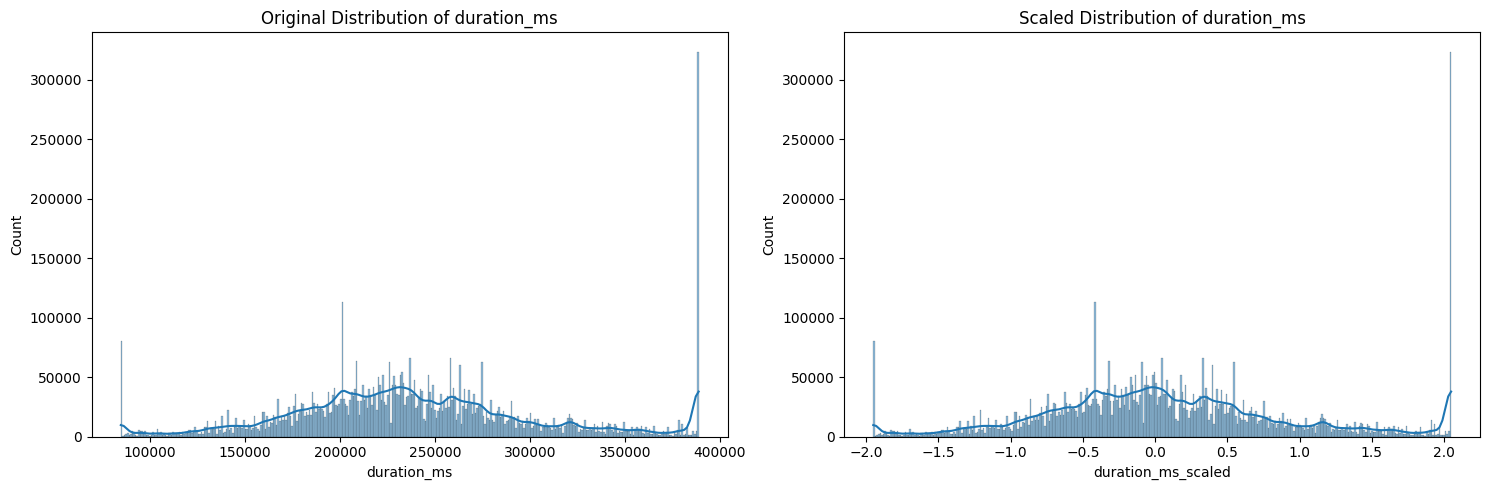

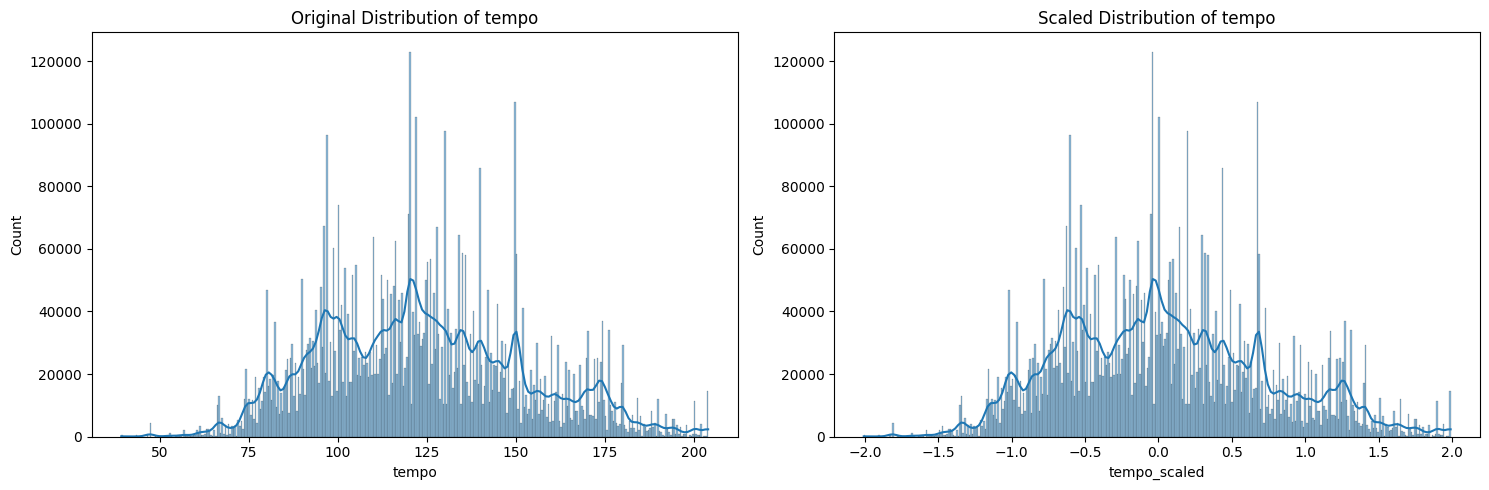

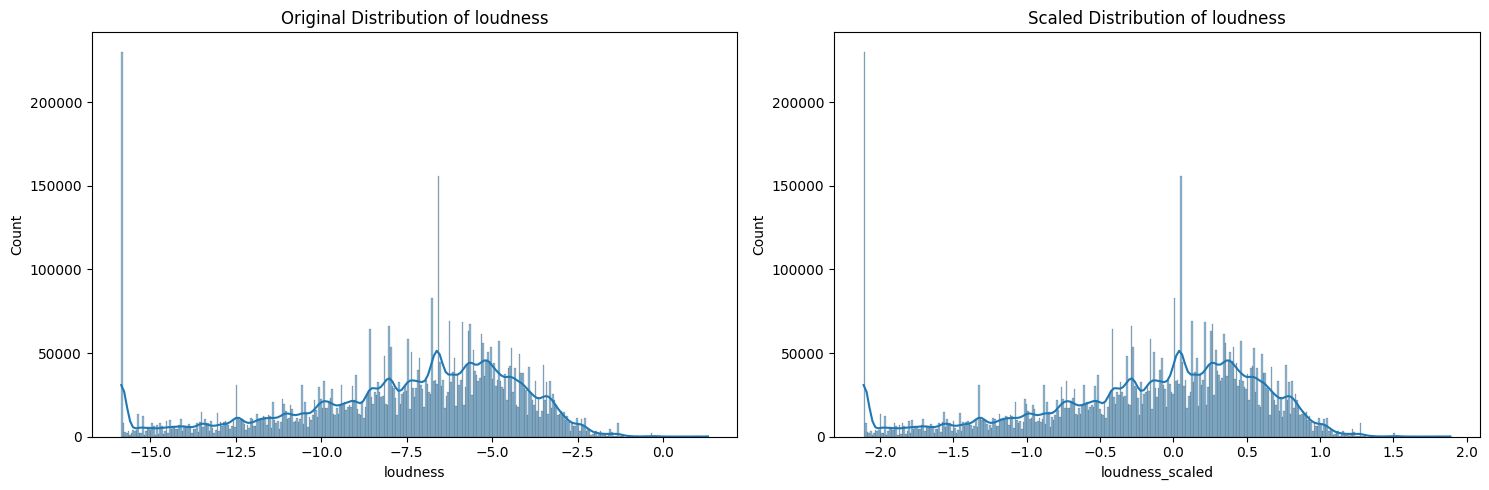


Scaling Summary:
{'playcount': {'original_range': 2.5, 'scaled_range': 2.5, 'original_std': 0.9776593167885598, 'scaled_std': 0.9776593167885598, 'original_iqr': 1.0, 'scaled_iqr': 1.0}, 'age': {'original_range': 51.0, 'scaled_range': 1.9615384615384617, 'original_std': 15.002739878862378, 'scaled_std': 0.577028456879322, 'original_iqr': 26.0, 'scaled_iqr': 1.0}, 'gender': {'original_range': 1.0, 'scaled_range': 1.0, 'original_std': 0.4999996206216988, 'scaled_std': 0.4999996206216988, 'original_iqr': 1.0, 'scaled_iqr': 1.0}, 'year': {'original_range': 28.0, 'scaled_range': 4.0, 'original_std': 5.729750949799252, 'scaled_std': 0.8185358499713222, 'original_iqr': 7.0, 'scaled_iqr': 1.0}, 'duration_ms': {'original_range': 304000.0, 'scaled_range': 4.0, 'original_std': 66500.70148431961, 'scaled_std': 0.8750092300568374, 'original_iqr': 76000.0, 'scaled_iqr': 1.0}, 'danceability': {'original_range': 0.9040000000000001, 'scaled_range': 4.0, 'original_std': 0.16730423232047606, 'scaled_std

/tmp/ipykernel_149888/257591351.py:94: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = stats.spearmanr(self.df[col], self.df[target_column])[0]
/tmp/ipykernel_149888/257591351.py:100: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = stats.spearmanr(



Feature Impact Analysis:
{'original_correlations': {'age': -0.00018649453487300704, 'gender': -0.000684040499126427, 'year': 0.056728254964784605, 'duration_ms': -0.005624768347493639, 'danceability': 0.016495635019174802, 'energy': -0.00020680300941378928, 'key': -0.0016486070996485733, 'loudness': 0.023298213366926886, 'mode': 0.003864150465028745, 'speechiness': -0.015401830199133392, 'acousticness': 0.015484764345254483, 'instrumentalness': -0.052461779329364334, 'liveness': -0.001283535562929132, 'valence': 0.004667603493810803, 'tempo': 0.0005522514691489263, 'time_signature': nan}, 'scaled_correlations': {'age_scaled': -0.00018649453487300704, 'gender_scaled': -0.000684040499126427, 'year_scaled': 0.056728254964784605, 'duration_ms_scaled': -0.005624768347493639, 'danceability_scaled': 0.016495635019174802, 'energy_scaled': -0.00020680300941378928, 'key_scaled': -0.0016486070996485733, 'loudness_scaled': 0.023298213366926886, 'mode_scaled': 0.003864150465028745, 'speechiness_sc

: 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import RobustScaler
import logging
from typing import Dict, List, Tuple, Optional

class MusicDataAnalyzer:
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        self.df_scaled = None
        self.scaler = None
        self.numeric_columns = df.select_dtypes(include=[np.number]).columns
        
    def scale_features(self, columns: Optional[List[str]] = None) -> pd.DataFrame:
        """
        Apply RobustScaler to specified numeric columns.
        
        Parameters:
        columns: List of columns to scale. If None, scales all numeric columns.
        
        Returns:
        DataFrame with scaled features
        """
        if columns is None:
            columns = self.numeric_columns
            
        # Create a copy of the dataframe
        self.df_scaled = self.df.copy()
        
        # Initialize scaler
        self.scaler = RobustScaler()
        
        # Scale specified columns
        self.df_scaled[columns] = self.scaler.fit_transform(self.df_scaled[columns])
        
        # Add suffix to scaled columns
        for col in columns:
            self.df_scaled.rename(columns={col: f"{col}_scaled"}, inplace=True)
            
        return self.df_scaled
    
    def compare_distributions(self, columns: Optional[List[str]] = None) -> None:
        """
        Compare original and scaled distributions for specified columns.
        """
        if self.df_scaled is None:
            raise ValueError("Please run scale_features() first")
            
        if columns is None:
            columns = self.numeric_columns
            
        for col in columns:
            plt.figure(figsize=(15, 5))
            
            # Original distribution
            plt.subplot(1, 2, 1)
            sns.histplot(self.df[col], kde=True)
            plt.title(f'Original Distribution of {col}')
            
            # Scaled distribution
            plt.subplot(1, 2, 2)
            sns.histplot(self.df_scaled[f"{col}_scaled"], kde=True)
            plt.title(f'Scaled Distribution of {col}')
            
            plt.tight_layout()
            plt.show()
    
    def generate_descriptive_stats(self, scaled: bool = False) -> pd.DataFrame:
        """Generate comprehensive descriptive statistics including skewness and kurtosis."""
        df_to_use = self.df_scaled if scaled and self.df_scaled is not None else self.df
        columns_to_use = [col for col in df_to_use.columns if col in self.numeric_columns or '_scaled' in col]
        
        stats_df = df_to_use[columns_to_use].describe()
        stats_df.loc['skewness'] = df_to_use[columns_to_use].skew()
        stats_df.loc['kurtosis'] = df_to_use[columns_to_use].kurtosis()
        return stats_df
    
    def analyze_feature_impact(self, target_column: str) -> Dict[str, float]:
        """
        Analyze the impact of scaling on feature relationships with target variable.
        """
        if self.df_scaled is None:
            raise ValueError("Please run scale_features() first")
            
        original_correlations = {}
        scaled_correlations = {}
        
        # Calculate correlations for original features
        for col in self.numeric_columns:
            if col != target_column:
                correlation = stats.spearmanr(self.df[col], self.df[target_column])[0]
                original_correlations[col] = correlation
                
        # Calculate correlations for scaled features
        for col in self.numeric_columns:
            if col != target_column:
                correlation = stats.spearmanr(
                    self.df_scaled[f"{col}_scaled"], 
                    self.df_scaled[f"{target_column}_scaled"]
                )[0]
                scaled_correlations[f"{col}_scaled"] = correlation
                
        return {
            'original_correlations': original_correlations,
            'scaled_correlations': scaled_correlations
        }

    def get_scaling_summary(self) -> Dict[str, Dict[str, float]]:
        """
        Get summary statistics about the scaling transformation.
        """
        if self.df_scaled is None:
            raise ValueError("Please run scale_features() first")
            
        summary = {}
        for col in self.numeric_columns:
            summary[col] = {
                'original_range': self.df[col].max() - self.df[col].min(),
                'scaled_range': self.df_scaled[f"{col}_scaled"].max() - self.df_scaled[f"{col}_scaled"].min(),
                'original_std': self.df[col].std(),
                'scaled_std': self.df_scaled[f"{col}_scaled"].std(),
                'original_iqr': self.df[col].quantile(0.75) - self.df[col].quantile(0.25),
                'scaled_iqr': self.df_scaled[f"{col}_scaled"].quantile(0.75) - self.df_scaled[f"{col}_scaled"].quantile(0.25)
            }
        return summary

# Example usage:
if __name__ == "__main__":
    # Assuming df is your DataFrame
    analyzer = MusicDataAnalyzer(df)
    
    # Scale features
    scaled_df = analyzer.scale_features()
    
    # Compare original and scaled distributions
    analyzer.compare_distributions(['duration_ms', 'tempo', 'loudness'])
    
    # Get scaling summary
    scaling_summary = analyzer.get_scaling_summary()
    print("\nScaling Summary:")
    print(scaling_summary)
    
    # Analyze impact on feature relationships
    impact_analysis = analyzer.analyze_feature_impact('playcount')
    print("\nFeature Impact Analysis:")
    print(impact_analysis)
    
    # Generate statistics for both original and scaled data
    original_stats = analyzer.generate_descriptive_stats(scaled=False)
    scaled_stats = analyzer.generate_descriptive_stats(scaled=True)
    
    print("\nOriginal Statistics:")
    print(original_stats)
    print("\nScaled Statistics:")
    print(scaled_stats)

In [7]:
# data.shape, df.shape
# print(
#     f"Original data shape: {data.shape}\nDataframe shape after processing: {df.shape}"
# )

In [8]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import RobustScaler

# class MusicPreprocessor:
#     def __init__(self, handle_outliers='robust'):
#         """
#         Initialize the preprocessor

#         Parameters:
#         handle_outliers (str): Strategy for handling outliers
#             'robust': Use RobustScaler
#             'cap': Use IQR-based capping
#             'none': Leave outliers as is
#         """
#         self.handle_outliers = handle_outliers
#         self.scalers = {}

#     def _cap_outliers(self, series):
#         Q1 = series.quantile(0.25)
#         Q3 = series.quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         return np.clip(series, lower_bound, upper_bound)

#     def fit_transform(self, df):
#         """Preprocess the music dataset"""
#         df_processed = df.copy()

#         # 1. Handle temporal features
#         if 'release_year' in df_processed.columns:
#             df_processed['music_age'] = 2024 - df_processed['release_year']

#         # 2. Handle plays (use log transformation due to heavy skew)
#         if 'plays' in df_processed.columns:
#             df_processed['plays_log'] = np.log1p(df_processed['plays'])

#         # 3. Process audio features
#         audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
#                          'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

#         for feature in audio_features:
#             if feature in df_processed.columns:
#                 if self.handle_outliers == 'cap':
#                     df_processed[feature] = self._cap_outliers(df_processed[feature])
#                 elif self.handle_outliers == 'robust':
#                     self.scalers[feature] = RobustScaler()
#                     df_processed[feature] = self.scalers[feature].fit_transform(
#                         df_processed[feature].values.reshape(-1, 1)
#                     )

#         # 4. Create interaction features
#         df_processed['energy_loudness'] = df_processed['energy'] * df_processed['loudness']
#         df_processed['dance_valence'] = df_processed['danceability'] * df_processed['valence']

#         # 5. Drop highly correlated features to reduce multicollinearity
#         # (optional, depending on your model type)
#         high_corr_features = ['loudness']  # Since it's highly correlated with energy
#         df_processed = df_processed.drop(high_corr_features, axis=1)

#         return df_processed

#     def transform(self, df):
#         """Transform new data using fitted preprocessor"""
#         df_processed = df.copy()

#         if 'release_year' in df_processed.columns:
#             df_processed['music_age'] = 2024 - df_processed['release_year']

#         if 'plays' in df_processed.columns:
#             df_processed['plays_log'] = np.log1p(df_processed['plays'])

#         for feature, scaler in self.scalers.items():
#             if feature in df_processed.columns:
#                 df_processed[feature] = scaler.transform(
#                     df_processed[feature].values.reshape(-1, 1)
#                 )

#         df_processed['energy_loudness'] = df_processed['energy'] * df_processed['loudness']
#         df_processed['dance_valence'] = df_processed['danceability'] * df_processed['valence']

#         return df_processed.drop(['loudness'], axis=1)

# # Assuming df is already defined and contains the cleaned data from previous steps

# # Initialize the preprocessor with 'robust' outlier handling
# preprocessor = MusicPreprocessor(handle_outliers='robust')

# # Fit and transform the data
# df_processed = preprocessor.fit_transform(df)

# # Show the processed data
# df_processed.head()

In [15]:
df_processed.shape, df.shape
print(f"Processed data shape: {df_processed.shape}\nOriginal data shape: {df.shape}")

Processed data shape: (11528, 32)
Original data shape: (11528, 29)


2024-11-19 14:49:11,730 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-19 14:49:11,733 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-11-19 14:49:11,739 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-11-19 14:49:11,741 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-19 14:49:11,742 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-19 14:49:11,744 - DEBUG - findfont: score(FontEntr

   user_id  age gender           music          artist_name  \
0    83811   16      F    Bank Account            21 Savage   
1    83811   16      F    Little Talks  Of Monsters and Men   
2    13397   17      M   Wherever I Go          OneRepublic   
3    70645   44      M  No New Friends            DJ Khaled   
4    70645   44      M          Dreams       Campsite Dream   

                        featured_artists      genre  plays  duration  \
0                             Birdy, Zoé  Dark Trap     11      3.67   
1      Ninho, Snoop Dogg, Russ, Paramore    Unknown    686      4.44   
2  Keith Urban, DJ Khaled, NIKI, MF DOOM    Unknown    136      2.83   
3                     The xx, LIT killah        Pop    230      5.14   
4                                    NaN    Country    391      3.20   

                 music_id  ... release_date  explicit  age_group  \
0  2fQrGHiQOvpL9UgPvtYy6G  ...   2017-09-23      True      Gen Z   
1  2ihCaVdNZmnHZWt0fvAM7B  ...   2013-04-12     Fals

2024-11-19 14:49:12,159 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-11-19 14:49:12,160 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-11-19 14:49:12,161 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-11-19 14:49:12,163 - DEBUG - findfont: score(FontEntry(fname='/home/josh/anaconda3/envs/ReNeLLM/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='s

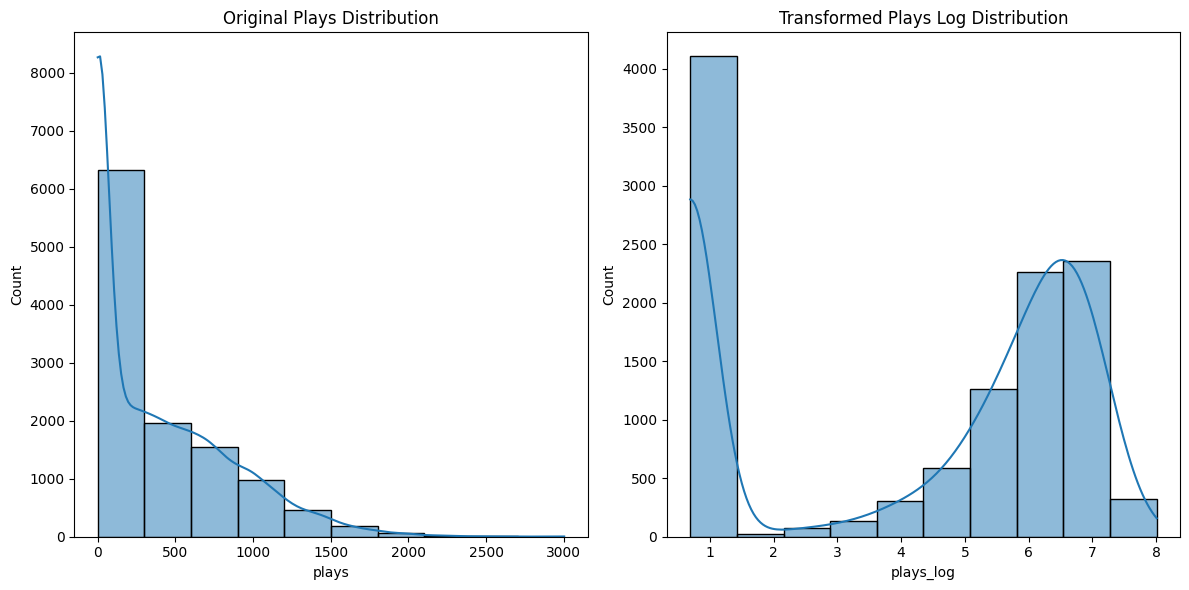

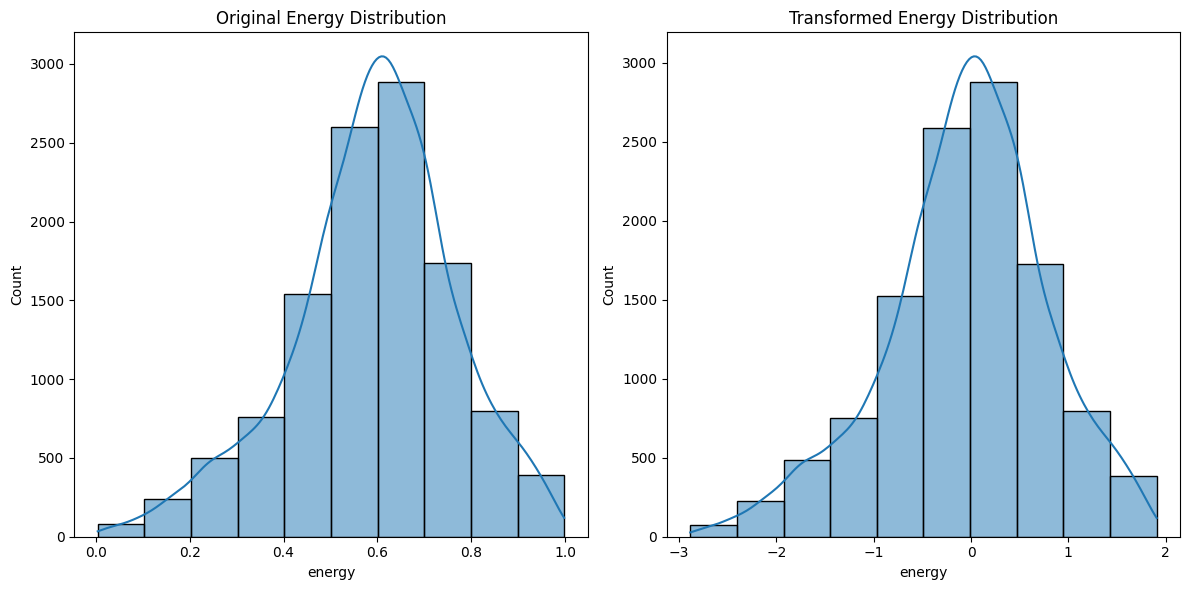

2024-11-19 14:49:13,414 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-19 14:49:13,432 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-19 14:49:13,505 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-19 14:49:13,523 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


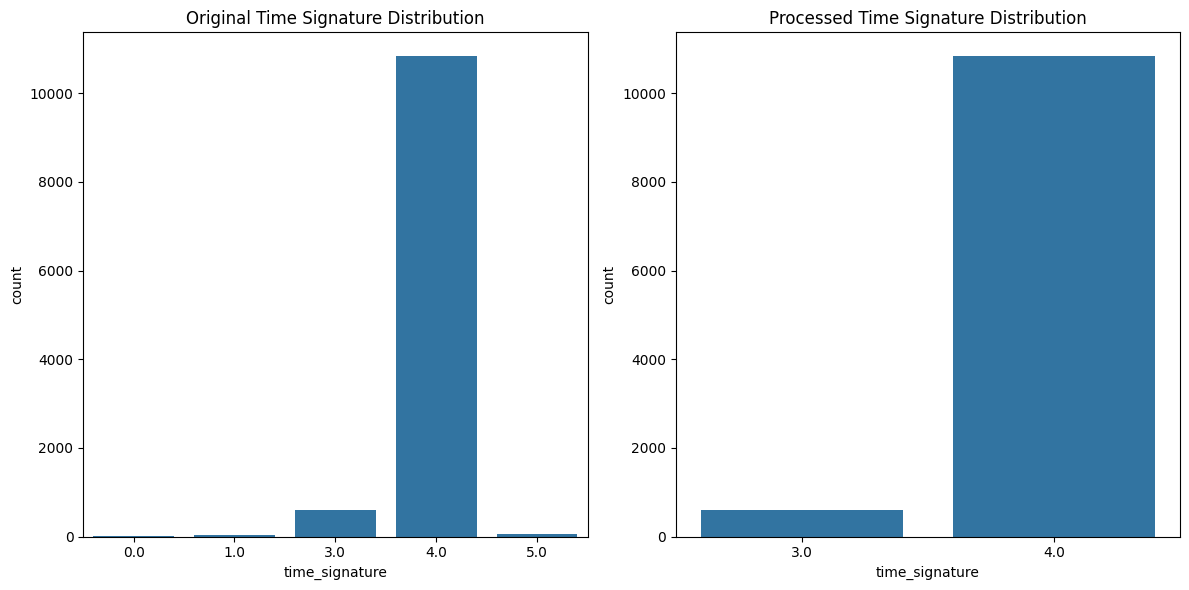

In [ ]:
class MusicPreprocessor:
    def __init__(self, handle_outliers="robust"):
        """
        Initialize the preprocessor

        Parameters:
        handle_outliers (str): Strategy for handling outliers
            'robust': Use RobustScaler
            'cap': Use IQR-based capping
            'none': Leave outliers as is
        """
        self.handle_outliers = handle_outliers
        self.scalers = {}

    def _cap_outliers(self, series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return np.clip(series, lower_bound, upper_bound)

    def _handle_time_signature_outliers(self, df):
        # Example: Filter out time signatures that are not in the expected range
        expected_time_signatures = [3, 4]
        df = df[df["time_signature"].isin(expected_time_signatures)]
        return df

    def fit_transform(self, df):
        """Preprocess the music dataset"""
        df_processed = df.copy()

        # 1. Handle temporal features
        if "release_year" in df_processed.columns:
            df_processed["music_age"] = 2024 - df_processed["release_year"]

        # 2. Handle playcount (use log transformation due to heavy skew)
        if "playcount" in df_processed.columns:
            df_processed["playcount_log"] = np.log1p(df_processed["playcount"])

        # 3. Handle time signature outliers
        df_processed = self._handle_time_signature_outliers(df_processed)

        # 4. Process audio features
        audio_features = [
            "acousticness",
            "danceability",
            "energy",
            "instrumentalness",
            "liveness",
            "loudness",
            "speechiness",
            "valence",
            "tempo",
        ]

        for feature in audio_features:
            if feature in df_processed.columns:
                if self.handle_outliers == "cap":
                    df_processed[feature] = self._cap_outliers(df_processed[feature])
                elif self.handle_outliers == "robust":
                    self.scalers[feature] = RobustScaler()
                    df_processed[feature] = self.scalers[feature].fit_transform(
                        df_processed[feature].values.reshape(-1, 1)
                    )

        # 5. Create interaction features
        df_processed["energy_loudness"] = (
            df_processed["energy"] * df_processed["loudness"]
        )
        df_processed["dance_valence"] = (
            df_processed["danceability"] * df_processed["valence"]
        )

        # 6. Drop highly correlated features to reduce multicollinearity
        # (optional, depending on your model type)
        high_corr_features = ["loudness"]  # Since it's highly correlated with energy
        df_processed = df_processed.drop(high_corr_features, axis=1, errors="ignore")

        return df_processed

    def transform(self, df):
        """Transform new data using fitted preprocessor"""
        df_processed = df.copy()

        if "release_year" in df_processed.columns:
            df_processed["music_age"] = 2024 - df_processed["release_year"]

        if "playcount" in df_processed.columns:
            df_processed["playcount_log"] = np.log1p(df_processed["playcount"])

        for feature, scaler in self.scalers.items():
            if feature in df_processed.columns:
                df_processed[feature] = scaler.transform(
                    df_processed[feature].values.reshape(-1, 1)
                )

        df_processed["energy_loudness"] = (
            df_processed["energy"] * df_processed["loudness"]
        )
        df_processed["dance_valence"] = (
            df_processed["danceability"] * df_processed["valence"]
        )

        return df_processed.drop(["loudness"], axis=1, errors="ignore")


# Assuming df is already defined and contains the cleaned data from previous steps

# Initialize the preprocessor with 'robust' outlier handling
preprocessor = MusicPreprocessor(handle_outliers="robust")

# Fit and transform the data
df_processed = preprocessor.fit_transform(df)

# Show the processed data
print(df_processed.head())

# Visualize the distribution before and after transformation
import matplotlib.pyplot as plt
import seaborn as sns

# Original 'playcount' distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["playcount"], bins=10, kde=True)
plt.title("Original playcount Distribution")

# Transformed 'playcount_log' distribution
plt.subplot(1, 2, 2)
sns.histplot(df_processed["playcount_log"], bins=10, kde=True)
plt.title("Transformed playcount Log Distribution")

plt.tight_layout()
plt.show()

# Original 'energy' distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["energy"], bins=10, kde=True)
plt.title("Original Energy Distribution")

# Transformed 'energy' distribution
plt.subplot(1, 2, 2)
sns.histplot(df_processed["energy"], bins=10, kde=True)
plt.title("Transformed Energy Distribution")

plt.tight_layout()
plt.show()

# Visualize the distribution of time_signature before and after transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="time_signature", data=df)
plt.title("Original Time Signature Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x="time_signature", data=df_processed)
plt.title("Processed Time Signature Distribution")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Robust Scaled Plays Distribution')

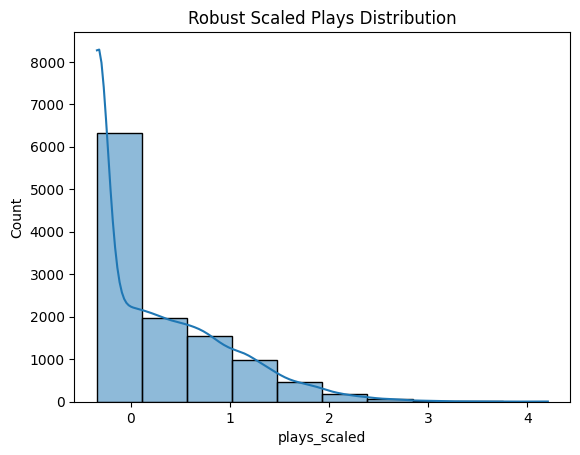

In [ ]:
# use robust scaling on "plays" and plot for visualization using seaborn
scaler = RobustScaler()
df["plays_scaled"] = scaler.fit_transform(df[["plays"]])
sns.histplot(df["plays_scaled"], bins=10, kde=True)
plt.title("Robust Scaled Plays Distribution")

Text(0.5, 1.0, 'Log Transformed Plays Distribution')

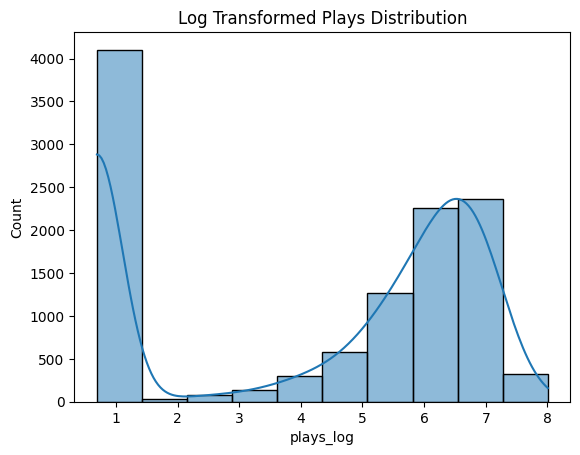

In [ ]:
df_processed["plays_log"]
sns.histplot(df_processed["plays_log"], bins=10, kde=True)
plt.title("Log Transformed Plays Distribution")

In [18]:
df_processed.head()

,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,...,release_date,explicit,age_group,release_year,new_user_id,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence
0,83811,16,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,11,3.67,2fQrGHiQOvpL9UgPvtYy6G,...,2017-09-23,True,Gen Z,2017,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7,2.484907,-0.132277,-0.972830
1,83811,16,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Unknown,686,4.44,2ihCaVdNZmnHZWt0fvAM7B,...,2013-04-12,False,Gen Z,2013,1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,11,6.532334,-0.109632,-0.047337
2,13397,17,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Unknown,136,2.83,46jLy47W8rkf8rEX04gMKB,...,2009-02-03,False,Gen Z,2009,2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,15,4.919981,0.077155,-0.039519
3,70645,44,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,230,5.14,5oVlbbiKGdGeZkWCFy0mqk,...,2017-01-01,False,Gen X,2017,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7,5.442418,-0.267584,-0.607147
4,70645,44,M,Dreams,Campsite Dream,NaN,Country,391,3.20,1SNoSoQ3JZldOhzBY9gw0n,...,1974,False,Gen X,1974,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,50,5.971262,0.117367,0.081196


In [ ]:
# replace user_id with hashed_user_id
df_processed.drop(columns=["user_id"], inplace=True)
df_processed.rename(columns={"hashed_user_id": "user_id"}, inplace=True)

In [ ]:
# handle missing values in 'genre' and 'featured_artists'
df_processed["genre"].replace("Unknown", "Other", inplace=True)
df_processed["featured_artists"].fillna("None", inplace=True)

In [ ]:
# make datframe of all unknown values in 'genre' and 'featured_artists' along with the music
unknown_genre = df_processed[df_processed["genre"] == "Other"]
unknown_artists = df_processed[df_processed["featured_artists"] == "NaN"]
unknown_artists
# unknown_genre

,user_id,age,gender,music,artist_name,featured_artists,genre,plays,duration,music_id,...,release_date,explicit,age_group,release_year,new_user_id,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence


In [61]:
df_processed.columns

Index(['user_id', 'age', 'gender', 'music', 'artist_name', 'featured_artists',
       'genre', 'plays', 'duration', 'music_id', 'id_artists', 'acousticness',
       'danceability', 'energy', 'key', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_date', 'explicit', 'age_group', 'release_year', 'new_user_id',
       'hashed_user_id', 'music_age', 'plays_log', 'energy_loudness',
       'dance_valence'],
      dtype='object')

In [ ]:
dance_valence, energy_loudness

In [63]:
mod_data = df_processed.drop(
    columns=[
        "user_id",
        "danceability",
        "energy",
        "valence",
        "plays",
        "new_user_id",
        "age_group",
        "release_date",
        "id_artists",
    ]
)

mod_data.head()

,age,gender,music,artist_name,featured_artists,genre,duration,music_id,acousticness,key,...,liveness,tempo,time_signature,explicit,release_year,hashed_user_id,music_age,plays_log,energy_loudness,dance_valence
0,16,F,Bank Account,21 Savage,"Birdy, Zoé",Dark Trap,3.67,2fQrGHiQOvpL9UgPvtYy6G,-0.955407,8,...,-0.934219,-2.537022,4.0,True,2017,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,7,2.484907,-0.132277,-0.972830
1,16,F,Little Talks,Of Monsters and Men,"Ninho, Snoop Dogg, Russ, Paramore",Unknown,4.44,2ihCaVdNZmnHZWt0fvAM7B,-0.385361,1,...,1.274342,-1.036430,4.0,False,2013,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,11,6.532334,-0.109632,-0.047337
2,17,M,Wherever I Go,OneRepublic,"Keith Urban, DJ Khaled, NIKI, MF DOOM",Unknown,2.83,46jLy47W8rkf8rEX04gMKB,0.242743,0,...,1.147169,0.022241,4.0,False,2009,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,15,4.919981,0.077155,-0.039519
3,44,M,No New Friends,DJ Khaled,"The xx, LIT killah",Pop,5.14,5oVlbbiKGdGeZkWCFy0mqk,1.317553,1,...,-0.827931,-0.623654,4.0,False,2017,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7,5.442418,-0.267584,-0.607147
4,44,M,Dreams,Campsite Dream,NaN,Country,3.20,1SNoSoQ3JZldOhzBY9gw0n,0.228950,0,...,0.109130,0.002027,4.0,False,1974,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,50,5.971262,0.117367,0.081196


In [ ]:
def is_missing(df):
    """ Returns a dataframe of columns with missing values and the number of missing values for each of the columns found """
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    return missing_columns

missing_columns = is_missing(mod_data)
missing_columns

# replace missing values in 'featured_artists' with 'None'
mod_data["featured_artists"].fillna("None", inplace=True)

/tmp/ipykernel_168037/870961012.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mod_data["featured_artists"].fillna("None", inplace=True)


In [68]:
is_missing(mod_data)
mod_data.to_csv("data/engineered_data.csv", index=False)

In [26]:
unknown_genre.shape
# music_list = unknown_genre['music'].tolist()
# music_list

(1633, 32)

In [ ]:
# use spotify api to obtain genre and featured artists
import configparser
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os

# extract credentials from config.ini file
config = configparser.ConfigParser()
config.read("config.ini")
client_id = config["SPOTIFY"]["CLIENT_ID"]
client_secret = config["SPOTIFY"]["CLIENT_SECRET"]

print(f"Client ID: {client_id}\nClient Secret: {client_secret}")


print(
    f"Unknown genres shape : {unknown_genre.shape}\nUnknown artists shape : {unknown_artists.shape}"
)

Client ID: '38887057140440d19bc12f2ca528b38d'
Client Secret: 'bfd8831a9ecd416eb473689a29c010f1'
Unknown genres shape : (1633, 32)
Unknown artists shape : (0, 32)


In [50]:
df_processed.columns

Index(['user_id', 'age', 'gender', 'music', 'artist_name', 'featured_artists',
       'genre', 'plays', 'duration', 'music_id', 'id_artists', 'acousticness',
       'danceability', 'energy', 'key', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'release_date', 'explicit', 'age_group', 'release_year', 'new_user_id',
       'hashed_user_id', 'music_age', 'plays_log', 'energy_loudness',
       'dance_valence'],
      dtype='object')

In [ ]:
import time
from tqdm import tqdm
import logging


class SpotifyGenreFetcher:
    def __init__(self, client_id, client_secret):
        self.sp = spotipy.Spotify(
            auth_manager=SpotifyClientCredentials(
                client_id=client_id, client_secret=client_secret
            )
        )
        self.batch_size = 50
        logging.basicConfig(level=logging.DEBUG)
        self.logger = logging.getLogger(__name__)

    def get_artist_genres(self, artist_id):
        if not isinstance(artist_id, str):
            self.logger.warning(f"Invalid artist ID type: {type(artist_id)}")
            return []
        try:
            artist = self.sp.artist(artist_id)
            return artist["genres"]
        except Exception as e:
            self.logger.error(f"Error fetching genres for artist {artist_id}: {str(e)}")
            return []

    def process_tracks_in_batches(self, unknown_genre_df):
        results = {}

        # Ensure we have valid track IDs
        track_ids = []
        for idx in unknown_genre_df.index:
            if isinstance(idx, str) and idx.strip():
                track_ids.append(idx)
            else:
                self.logger.warning(f"Skipping invalid track ID: {idx}")

        self.logger.info(f"Processing {len(track_ids)} valid track IDs")

        for i in tqdm(range(0, len(track_ids), self.batch_size)):
            batch = track_ids[i : i + self.batch_size]

            try:
                # Debug log the batch
                self.logger.debug(
                    f"Processing batch {i//self.batch_size + 1}: {batch[:5]}..."
                )

                # Get track details
                tracks = self.sp.tracks(batch)["tracks"]

                for track in tracks:
                    if not track:
                        continue

                    try:
                        # Get all artists for the track
                        artist_ids = [
                            artist["id"]
                            for artist in track["artists"]
                            if artist and artist.get("id")
                        ]

                        # Get genres for all artists
                        track_genres = []
                        for artist_id in artist_ids:
                            genres = self.get_artist_genres(artist_id)
                            track_genres.extend(genres)

                        # Store unique genres
                        results[track["id"]] = list(set(track_genres))

                    except Exception as e:
                        self.logger.error(
                            f"Error processing track {track.get('id', 'unknown')}: {str(e)}"
                        )

                time.sleep(0.1)  # Rate limiting

            except Exception as e:
                self.logger.error(f"Batch processing error: {str(e)}")
                continue

        return results


# Usage
fetcher = SpotifyGenreFetcher(client_id, client_secret)
genre_results = fetcher.process_tracks_in_batches(unknown_genre)

# Update DataFrame with new genres
updated_count = 0
for track_id, genres in genre_results.items():
    if track_id in unknown_genre.index:
        unknown_genre.at[track_id, "genre"] = genres[0] if genres else None
        updated_count += 1

print(f"Updated {updated_count} tracks with genres")
print(f"Sample of updated genres:")
print(unknown_genre[unknown_genre["genre"].notna()].head())

In [ ]:
import time
from tqdm import tqdm
import logging


class SpotifyGenreFetcher:
    def __init__(self, client_id, client_secret):
        self.sp = spotipy.Spotify(
            auth_manager=SpotifyClientCredentials(
                client_id=client_id, client_secret=client_secret
            )
        )
        self.batch_size = 50
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def get_track_info(self, track_name, artist_name=None):
        try:
            # Search with track name and artist if available
            query = f"track:{track_name}"
            if artist_name:
                query += f" artist:{artist_name}"

            results = self.sp.search(q=query, type="track", limit=1)

            if results["tracks"]["items"]:
                track = results["tracks"]["items"][0]
                artists = track["artists"]

                # Get genres for all artists
                genres = []
                for artist in artists:
                    artist_info = self.sp.artist(artist["id"])
                    genres.extend(artist_info["genres"])

                return list(set(genres))  # Return unique genres
            return []

        except Exception as e:
            self.logger.error(f"Error processing track {track_name}: {str(e)}")
            return []

    def process_tracks(self, unknown_genre_df):
        results = {}

        for idx, row in tqdm(unknown_genre_df.iterrows(), total=len(unknown_genre_df)):
            track_name = row["music"]
            artist_name = row["artist_name"] if "artist_name" in row else None

            if not isinstance(track_name, str):
                continue

            genres = self.get_track_info(track_name, artist_name)
            results[idx] = genres

            # Rate limiting
            time.sleep(0.1)

        return results


# Usage
fetcher = SpotifyGenreFetcher(client_id, client_secret)
genre_results = fetcher.process_tracks(unknown_genre)

# Update DataFrame with new genres
updated_count = 0
for idx, genres in genre_results.items():
    if genres:
        unknown_genre.at[idx, "genre"] = genres[0]  # Take first genre if multiple exist
        updated_count += 1

print(f"Updated {updated_count} tracks with genres")
print("\nSample of updated genres:")
print(unknown_genre[unknown_genre["genre"].notna()].head())

In [ ]:
import time
from tqdm import tqdm
import logging
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


class SpotifyGenreFetcher:
    def __init__(self, client_id, client_secret):
        self.sp = spotipy.Spotify(
            auth_manager=SpotifyClientCredentials(
                client_id=client_id, client_secret=client_secret
            )
        )
        self.batch_size = 50
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)

    def get_track_info(self, track_name, artist_name=None):
        try:
            # Search with track name and artist if available
            query = f"track:{track_name}"
            if artist_name:
                query += f" artist:{artist_name}"

            results = self.sp.search(q=query, type="track", limit=1)

            if results["tracks"]["items"]:
                track = results["tracks"]["items"][0]
                artists = track["artists"]

                # Get genres for all artists
                genres = []
                for artist in artists:
                    artist_info = self.sp.artist(artist["id"])
                    genres.extend(artist_info["genres"])

                return list(set(genres))  # Return unique genres
            return []

        except spotipy.exceptions.SpotifyException as e:
            self.logger.error(f"Spotify API error for track {track_name}: {str(e)}")
            return []
        except Exception as e:
            self.logger.error(f"Error processing track {track_name}: {str(e)}")
            return []

    def process_tracks(self, unknown_genre_df):
        results = {}

        for idx, row in tqdm(unknown_genre_df.iterrows(), total=len(unknown_genre_df)):
            track_name = row["music"]
            artist_name = row["artist_name"] if "artist_name" in row else None

            if not isinstance(track_name, str):
                continue

            genres = self.get_track_info(track_name, artist_name)
            results[idx] = genres

            # Rate limiting
            time.sleep(0.1)

        return results


# Usage
fetcher = SpotifyGenreFetcher(client_id, client_secret)
genre_results = fetcher.process_tracks(unknown_genre)

# Update DataFrame with new genres
updated_count = 0
for idx, genres in genre_results.items():
    if genres:
        unknown_genre.at[idx, "genre"] = genres[0]  # Take first genre if multiple exist
        updated_count += 1

print(f"Updated {updated_count} tracks with genres")
print("\nSample of updated genres:")
print(unknown_genre[unknown_genre["genre"].notna()].head())